<a href="https://colab.research.google.com/github/surimajain/IISc_Computational_Data_Science_2021/blob/main/MachineLearning/Surima_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of each 16 features. 

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).
 
 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.
 
Below are the Regularization techniques:
 
 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [350]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [351]:
# Read the hour.csv file
# YOUR CODE HERE
df_hour=pd.read_csv("/content/hour.csv")

print the first five rows of dataset

In [352]:
# YOUR CODE HERE
print(df_hour.head(5))
print(df_hour.shape)
df_hour.drop_duplicates(subset=None, inplace=True)
print(df_hour.shape)


   instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]
(17379, 17)
(17379, 17)


print the datatypes of the columns

In [353]:
# YOUR CODE HERE
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.4+ MB


**Inference**

Dataset has 17379 rows and 18 columns.

Except two column, all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)EDA`

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

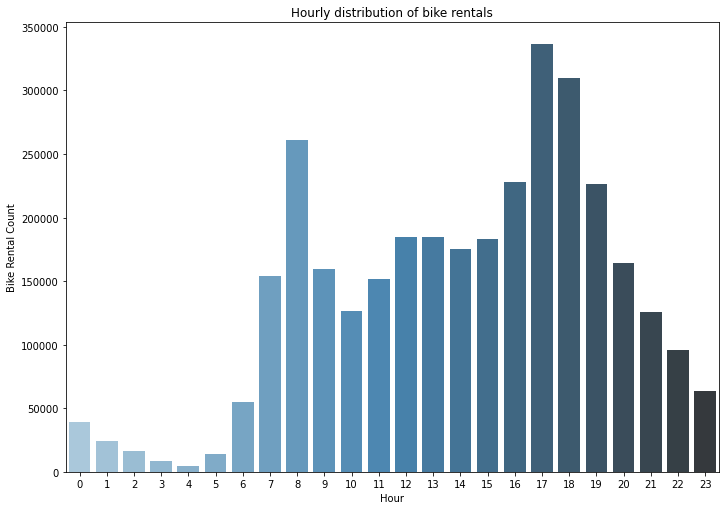

In [354]:
# YOUR CODE HERE
df_grouped_cnt=pd.DataFrame(df_hour.groupby(['hr'])['cnt'].sum())
df_grouped_cnt.reset_index(inplace=True)
df_grouped_cnt=df_grouped_cnt.sort_values(by='cnt')
# df_grouped_cnt
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

# sns.barplot(x='hr',y='cnt',data=df_grouped_cnt,order=df_grouped_cnt['hr'],palette="Blues_d",ax=ax)
sns.barplot(x='hr',y='cnt',data=df_grouped_cnt,palette="Blues_d",ax=ax)


# sns.lineplot(x='hr',y='cnt',data=df_grouped_cnt,color="Blue",sort=False)
ax.set_title("Hourly distribution of bike rentals")
ax.set_xlabel('Hour')
ax.set_ylabel('Bike Rental Count')
plt.show()

#### Visualize the distribution of count, casual and registered variables

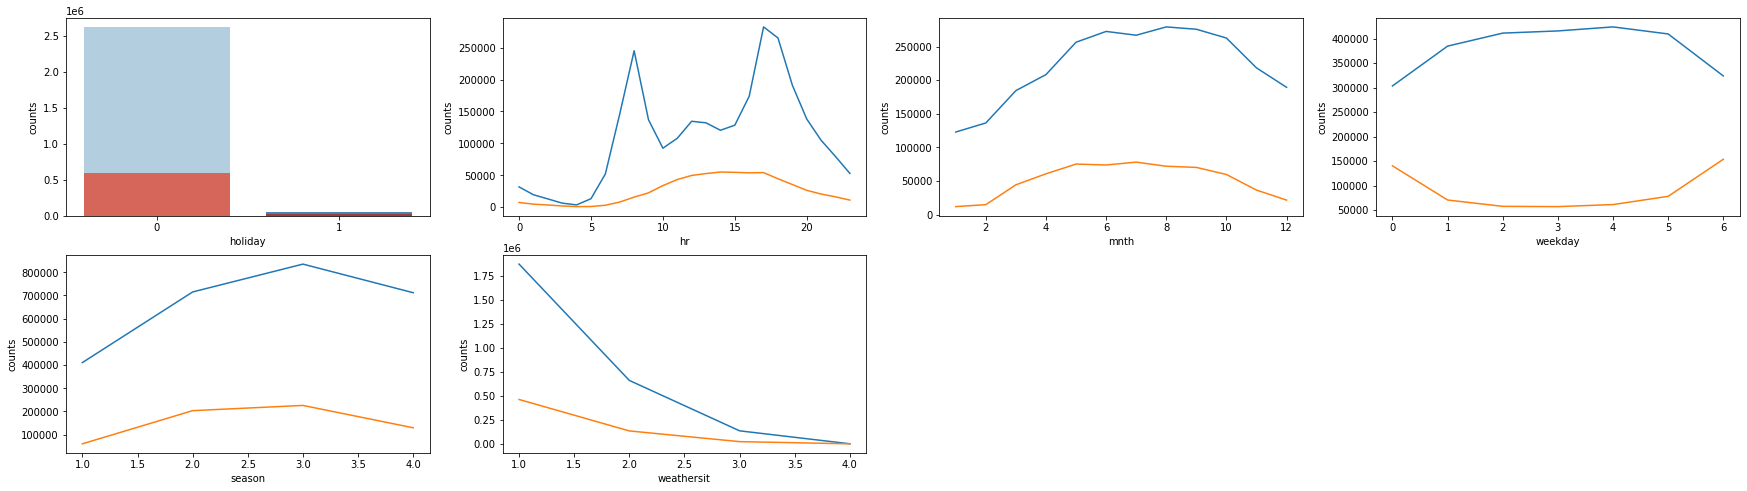

In [355]:
#Distribution of casual and registered per hour
# YOUR CODE HERE
fig, axes = plt.subplots(1,8, figsize=(30, 8))
cat_var=['holiday','hr','mnth','weekday','season','weathersit']
i=1
# j=0
for cat in cat_var:
  df_temp=df_hour
  df_cnt=df_temp.groupby(cat)[['cnt','registered','casual']].sum()
  plt.subplot(2,4,i)
  if cat=='holiday':
    # sns.lineplot(x=df_cnt.index, y=df_cnt.cnt,palette='Greys_d')
    sns.barplot(x=df_cnt.index, y=df_cnt.registered,palette='Blues')
    sns.barplot(x=df_cnt.index, y=df_cnt.casual,palette='Reds_d')
  else:
    sns.lineplot(x=df_cnt.index, y=df_cnt.registered,palette='Blues')
    sns.lineplot(x=df_cnt.index, y=df_cnt.casual,palette='Reds_d')
  plt.ylabel("counts")
  i=i+1

1. Over the holidays the demand for bike rent is non-existant.Hence we have dropped holiday from the feature list
2.During office hours there is a spike in demand from regsistered users (8-9,17-18) and a moderate peak around lunch time
3.Summer months(MAy-October) are popular for biking
4.There is an increase in casual bikers over the weekends and a dip in the registered ones 
5. As expected during  harsh weather (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ) there are no bikers.

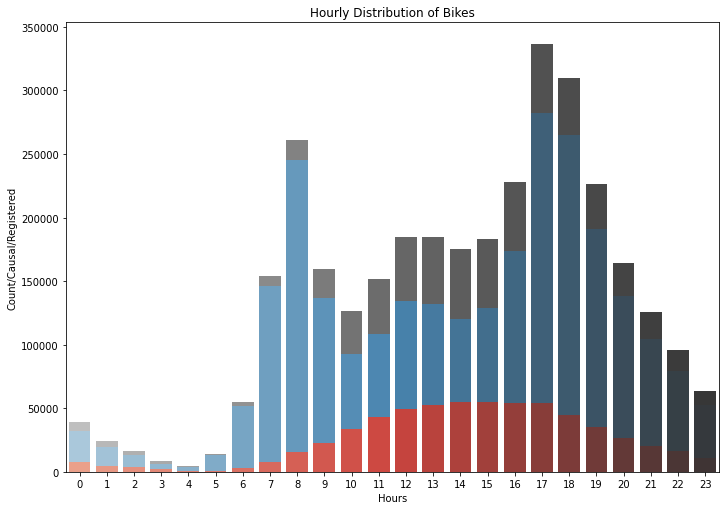

In [356]:
# YOUR CODE HERE for distribuiton of count variable
fig, ax = plt.subplots(1)
fig.set_size_inches(11.7, 8.27)
df_dist=df_hour[['cnt','hr','registered','casual']]
# fig, ax = plt.subplots()

df_dist.set_index('hr')#.T.plot(kind='bar', stacked=True)
sns.barplot(x='hr',y=df_hour.groupby('hr')['cnt'].sum(),data=df_dist,palette='Greys_d')
sns.barplot(x='hr',y=df_hour.groupby('hr')['registered'].sum(),data=df_dist,palette='Blues_d')
sns.barplot(x='hr',y=df_hour.groupby('hr')['casual'].sum(),data=df_dist,palette='Reds_d')

plt.title("Hourly Distribution of Bikes")
plt.xlabel("Hours")
plt.ylabel("Count/Causal/Registered")
plt.show()

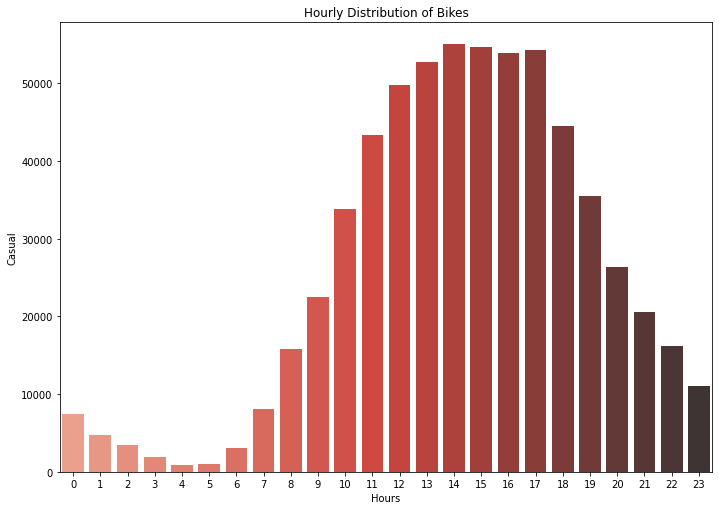

In [357]:
# YOUR CODE HERE for distribuiton of casual variable
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

df_dist.set_index('hr')#.T.plot(kind='bar', stacked=True)
sns.barplot(x='hr',y=df_hour.groupby('hr')['casual'].sum(),data=df_dist,palette='Reds_d')

plt.title("Hourly Distribution of Bikes")
plt.xlabel("Hours")
plt.ylabel("Casual")
plt.show()

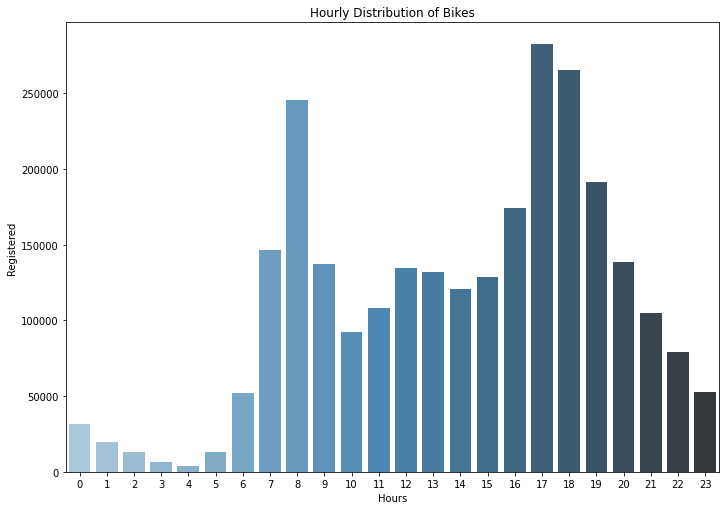

In [358]:
# YOUR CODE HERE for distribuiton of registered variable
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

df_dist.set_index('hr')#.T.plot(kind='bar', stacked=True)
sns.barplot(x='hr',y=df_hour.groupby('hr')['registered'].sum(),data=df_dist,palette='Blues_d')

plt.title("Hourly Distribution of Bikes")
plt.xlabel("Hours")
plt.ylabel("Registered")
plt.show()

#### Describe the relation of weekday, holiday and working day

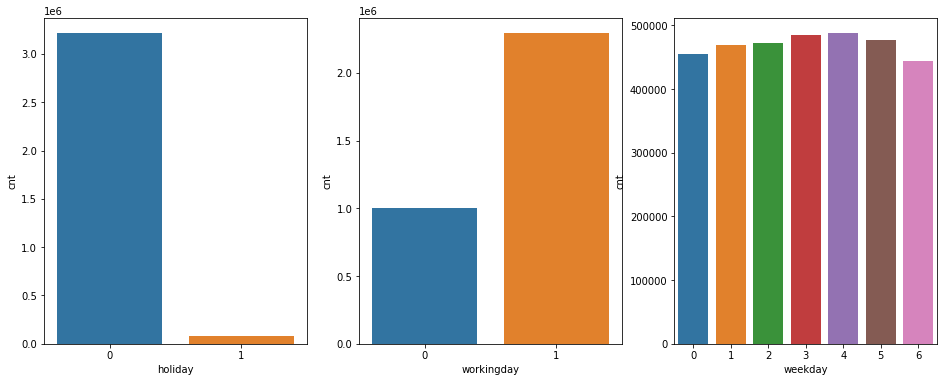

In [359]:
# YOUR CODE HERE
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(16,6),ncols=3)
df_week_holi_working=df_hour
df_week_holi_working.groupby('holiday')['cnt'].sum()
sns.barplot(x=df_week_holi_working['holiday'].unique(),y=df_week_holi_working.groupby('holiday')['cnt'].sum(),ax=ax1)
ax1.set_xlabel("holiday")
sns.barplot(x=df_week_holi_working['workingday'].unique(),y=df_week_holi_working.groupby('workingday')['cnt'].sum(),ax=ax2)
ax2.set_xlabel("workingday")
sns.barplot(x=df_week_holi_working['weekday'].unique(),y=df_week_holi_working.groupby('weekday')['cnt'].sum(),ax=ax3)
# sns.barplot(x=df_week_holi_working['weekday'].unique(),y=df_week_holi_working.groupby('weekday')['casual'].sum(),ax=ax3)
# sns.barplot(x=df_week_holi_working['weekday'].unique(),y=df_week_holi_working.groupby('weekday')['registered'].sum(),ax=ax3)

ax3.set_xlabel("weekday")
plt.show()

# df_hour[['holiday','weekday','workingday']].corr()


1.

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

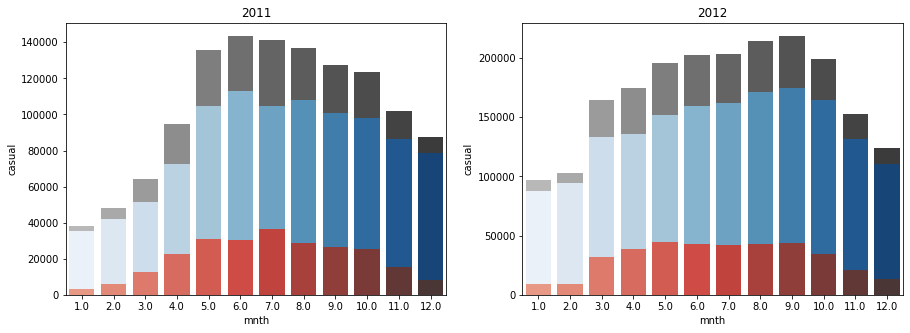

In [360]:
# stacked bar chart for year 2011
# YOUR CODE HERE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# df_hour.where(df_hour.dteday>'2011-01-01').dropna()
df_hour['cal_year']=df_hour['dteday'].str.split("-", n = 1, expand = True)[0]
year_cnt=0
for year in df_hour['cal_year'].unique():
  df_temp=df_hour.where(df_hour.cal_year==year)
  df_cnt=df_temp.groupby('mnth')['cnt'].sum()
  df_registered=df_temp.groupby('mnth')['registered'].sum()
  df_casual=df_temp.groupby('mnth')['casual'].sum()
  
  sns.barplot(ax=axes[year_cnt], x=df_cnt.index, y=df_cnt,palette='Greys_d')
  sns.barplot(ax=axes[year_cnt], x=df_registered.index, y=df_registered,palette='Blues')
  sns.barplot(ax=axes[year_cnt], x=df_casual.index, y=df_casual,palette='Reds_d')
  axes[year_cnt].set_title(year)
  year_cnt=year_cnt+1

In [361]:
# stacked bar chart for year 2012
# YOUR CODE HERE

#### Analyze the correlation between features with heatmap

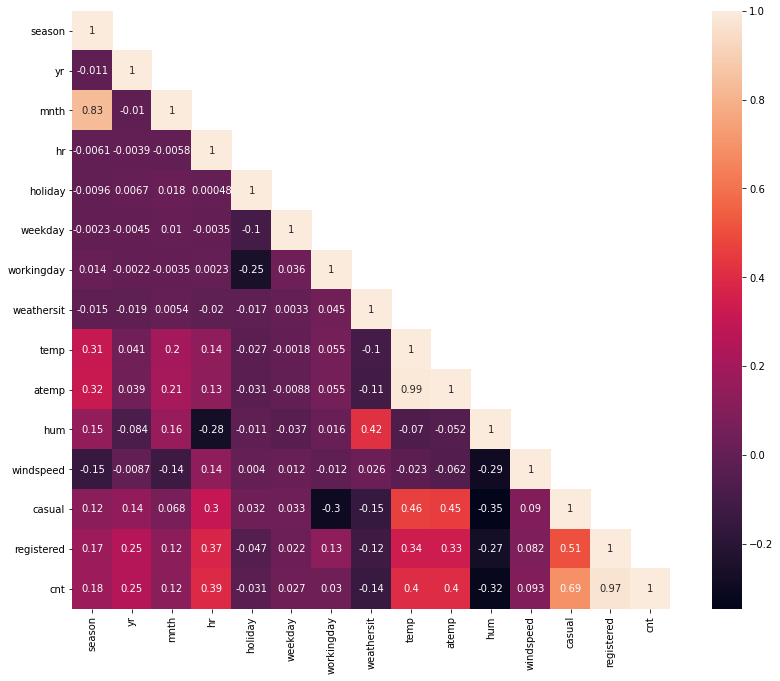

In [362]:
# YOUR CODE HERE
fig, ax = plt.subplots()
fig.set_size_inches(15, 11)
df_hour=df_hour.drop(columns=['instant'])
corrMatt=df_hour.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
            square=True,annot=True)
plt.show()


#### Visualize the box plot of casual and registered variables to check the outliers

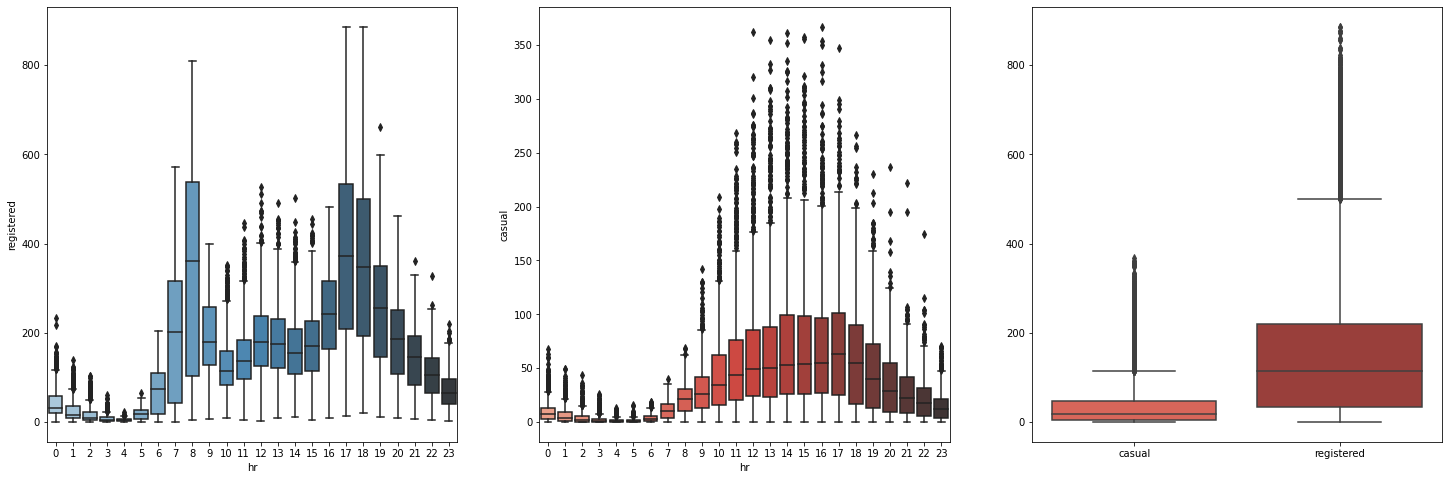

In [363]:
# YOUR CODE HERE
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

sns.boxplot(ax=axes[0],x=df_hour['hr'],y=df_hour['registered'],data=df_hour,palette='Blues_d')
sns.boxplot(ax=axes[1],x=df_hour['hr'],y=df_hour['casual'],data=df_hour,palette='Reds_d')
sns.boxplot(ax=axes[2],data=df_hour[['casual','registered']],palette='Reds_d')
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [364]:
# YOUR CODE HERE
#DROP COLUMNS WHERE CORRELATION>0.5
upper_tri = corrMatt.where(np.triu(np.ones(corrMatt.shape),k=1).astype(np.bool))
upper_tri
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)
df = df_hour.drop(to_drop, axis=1)
df=df.drop(['cal_year'],axis=1)
df['cnt']=df_hour['cnt']
df

['atemp', 'cnt']


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,13,48,61


#### Identify categorical and continuous variables


In [365]:
# YOUR CODE HERE
cat_var = [col for col in df.columns if len(df[col].unique()) <=24]  
num_var = [col for col in df.columns if len(df[col].unique()) > 24]
num_var.remove('dteday')
print("Categorical variables",cat_var)
print("Continuous variables",num_var)


Categorical variables ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
Continuous variables ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


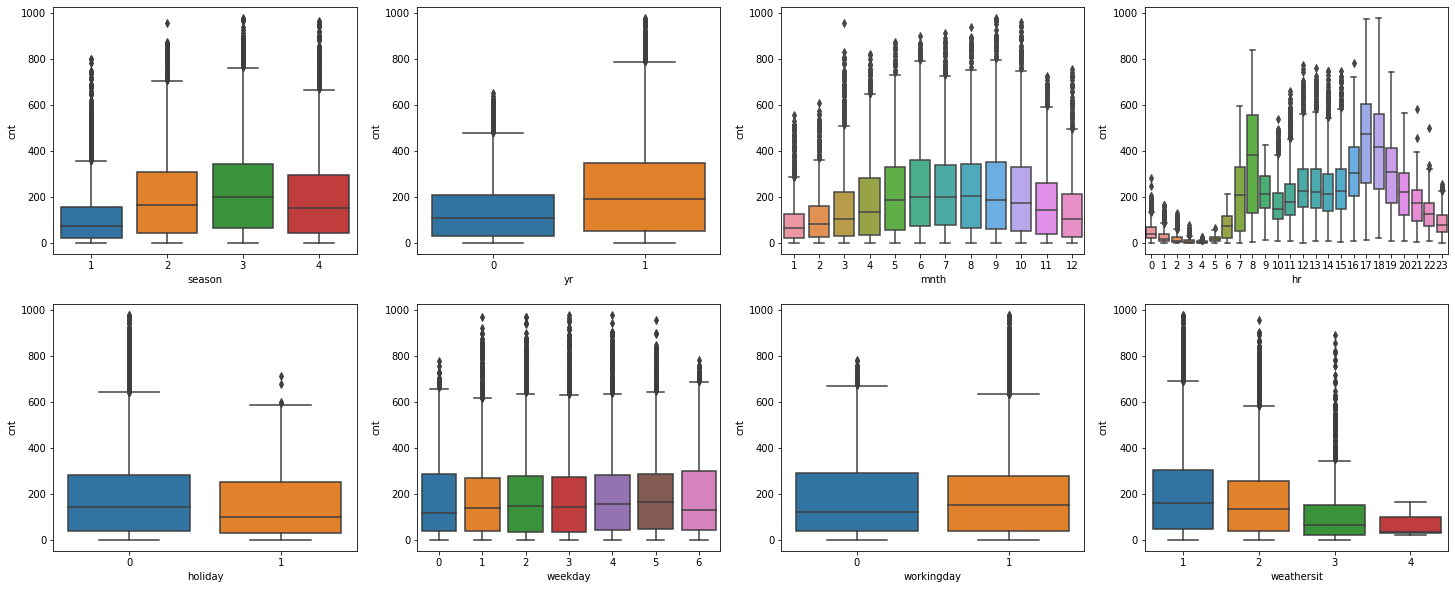

In [366]:
plt.figure(figsize=(25, 10))
i=1
for cat in cat_var:  
  plt.subplot(2,4,i)
  sns.boxplot(x = cat, y = 'cnt', data = df_hour)
  i=i+1
plt.show()

The inference that We could derive were:

**season**: Almost 32% of the bike booking were happening in season3. This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

**Month**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 .This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

**weathersit**: Almost 45% of the bike booking were happening during ‘weathersit1. This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

**holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

**weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

**workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

In [367]:
cat_var.remove('holiday')
cat_var

['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']

#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [368]:
print(num_var)

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


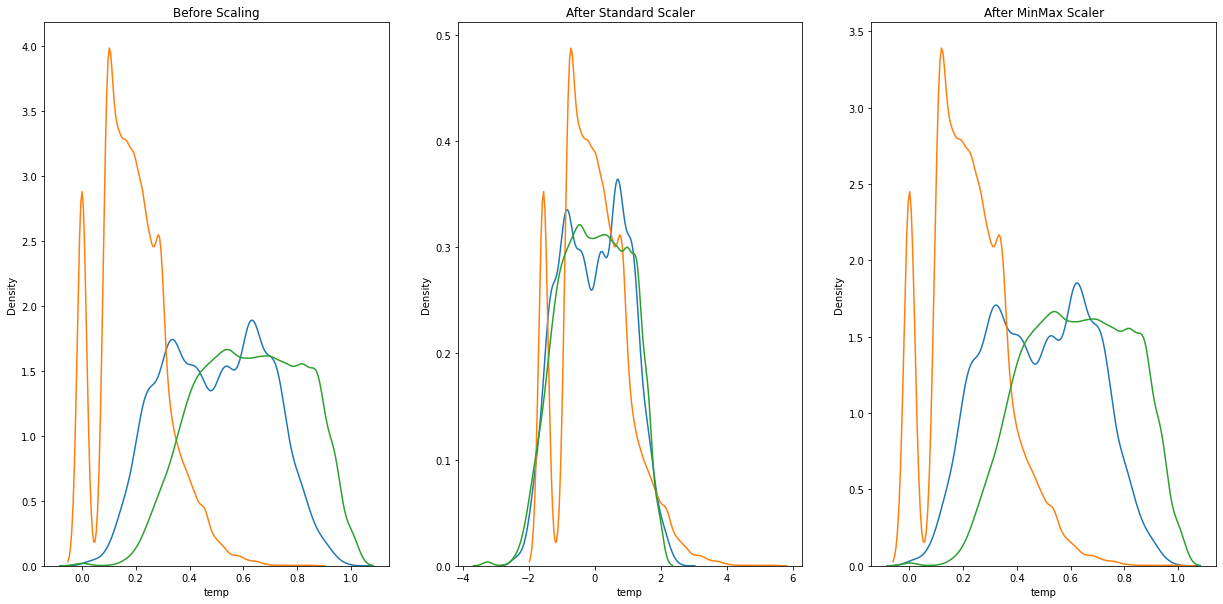

In [369]:
# YOUR CODE HERE
num_var.remove('casual')
num_var.remove('registered')
num_var.remove('cnt')


# ,'registered', 'cnt')
df_std=df[num_var]
df_std
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(df_std)
scaled_columns_df = pd.DataFrame(scaled_columns, columns=num_var)

min_max_scaler = MinMaxScaler()
min_max_scaled_df = min_max_scaler.fit_transform(df_std)
min_max_scaled_df = pd.DataFrame(min_max_scaled_df, columns=num_var)
# scaler = MinMaxScaler()
# scaled_columns  = scaler.fit_transform(hour_copy[ContinuousCols]) 
# scaled_columns_df=pd.DataFrame(scaled_columns,columns=['temp','hum','windspeed'])

# scaled_columns_df.head()

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(21, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(df['temp'], ax=ax1)
sns.kdeplot(df['windspeed'], ax=ax1)
sns.kdeplot(df['hum'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['temp'], ax=ax2)
sns.kdeplot(scaled_df['windspeed'], ax=ax2)
sns.kdeplot(scaled_df['hum'], ax=ax2)

ax3.set_title('After MinMax Scaler')
sns.kdeplot(min_max_scaled_df['temp'], ax=ax3,legend=True)
sns.kdeplot(min_max_scaled_df['windspeed'], ax=ax3,legend=True)
sns.kdeplot(min_max_scaled_df['hum'], ax=ax3,legend=True)
plt.show()

#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [370]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder

# CategoricalCols= cat_var
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder
CategoricalCols=['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']

encoder  = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df_hour[CategoricalCols])
encoded_columns_df=pd.DataFrame(encoded_columns)
encoded_columns_df
# print(df_hour.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17375,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17376,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
17377,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [371]:
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)
processed_df=pd.DataFrame(processed_data)
processed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,-1.334648,0.947372,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.438516,0.895539,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.438516,0.895539,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.334648,0.636370,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.334648,0.636370,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-0.141137,-0.211691,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17375,-1.230779,-0.141137,-0.211691,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17376,-1.230779,-0.141137,-0.211691,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
17377,-1.230779,-0.348473,-0.456099,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Specify features and targets after applying scaling and one-hot encoding

In [372]:
X=processed_df
print("FEATURES:\n", X.head())
y=df_hour['cnt']
print("TARGET:\n",y.head())

FEATURES:
          0         1         2    3    4    5   ...   52   53   54   55   56   57
0 -1.334648  0.947372 -1.553889  1.0  0.0  0.0  ...  1.0  0.0  1.0  0.0  0.0  0.0
1 -1.438516  0.895539 -1.553889  1.0  0.0  0.0  ...  1.0  0.0  1.0  0.0  0.0  0.0
2 -1.438516  0.895539 -1.553889  1.0  0.0  0.0  ...  1.0  0.0  1.0  0.0  0.0  0.0
3 -1.334648  0.636370 -1.553889  1.0  0.0  0.0  ...  1.0  0.0  1.0  0.0  0.0  0.0
4 -1.334648  0.636370 -1.553889  1.0  0.0  0.0  ...  1.0  0.0  1.0  0.0  0.0  0.0

[5 rows x 58 columns]
TARGET:
 0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64


### Implement the linear regression by finding the coefficients using below approaches (3 points)

* Find the coefficients using normal equation

* Implement batch gradient descent

* SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [373]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [374]:
# YOUR CODE HERE
# X=df_hour[cat_var]
# Y=df_hour['cnt']
# theta=X.T
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
IdentitySize = X_train.shape[1]
IdentityMatrix= np.zeros((IdentitySize, IdentitySize))
np.fill_diagonal(IdentityMatrix, 1)
lamb = 1

theta = np.linalg.lstsq(X_train.T.dot(X_train) + lamb * IdentityMatrix, X_train.T.dot(y_train))[0] 
theta
# print(X.shape)
# print(theta.shape)

array([  45.74013151,  -14.95178438,   -4.43587125,  -12.69916355,
         21.3776315 ,   22.64755942,   58.57068955,    2.76994099,
         87.12677594,    2.94966868,    7.50192607,   20.88027721,
         13.42661377,   24.58312815,    9.06509485,  -18.30341405,
          4.6494828 ,   26.06164002,   14.87755791,  -11.24693187,
         -4.5483266 , -122.21930933, -136.73414954, -145.25659837,
       -154.56876113, -159.4233019 , -148.511034  ,  -84.74855828,
         51.94946199,  193.12082161,   42.17861462,  -11.71888108,
         14.36845414,   50.96419684,   46.29071328,   31.12789111,
         36.85777538,  105.28969044,  254.67393056,  224.57366442,
        115.77077027,   36.35175491,  -12.9761903 ,  -50.33428206,
        -87.12995666,   22.58459971,    3.88004547,    3.08294912,
          4.20296301,    8.22117703,   11.18332646,   36.74165613,
         30.91425303,   58.9824639 ,   55.72275391,   44.75158371,
        -11.18283043,    0.60520974])

#### Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [375]:
# YOUR CODE HERE
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m                             
        # Changing Values of Coefficients using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
    return B, cost_history

alpha = 0.0001
iter_ = 2000
newTheta, cost_history = batch_gradient_descent(X_train, y_train, theta, alpha, iter_)
newTheta

0      45.740775
1     -14.951946
2      -4.435971
3     -12.699410
4      21.377908
5      22.647845
6      58.571581
7       2.769887
8      87.128037
9       2.949707
10      7.502037
11     20.880601
12     13.426813
13     24.583505
14      9.065215
15    -18.303742
16      4.649530
17     26.062039
18     14.877776
19    -11.247139
20     -4.548419
21   -122.221321
22   -136.736398
23   -145.258987
24   -154.571302
25   -159.425922
26   -148.513476
27    -84.749956
28     51.950303
29    193.123973
30     42.179295
31    -11.719084
32     14.368678
33     50.965019
34     46.291458
35     31.128389
36     36.858366
37    105.291402
38    254.678088
39    224.577329
40    115.772654
41     36.352339
42    -12.976414
43    -50.335117
44    -87.131394
45     22.584935
46      3.880071
47      3.082962
48      4.202994
49      8.221272
50     11.183470
51     36.742221
52     30.914679
53     58.983245
54     55.723478
55     44.752253
56    -11.183027
57      0.605220
dtype: float64

In [376]:
y_pred = X_test.dot(newTheta)

In [377]:
y_df=pd.DataFrame(y_pred,columns=['y_pred'])
y_df['y_test']=y_test
y_df

,y_pred,y_test
355,83.454174,3
14459,430.850724,482
12414,299.001132,226
13147,159.344882,150
3439,17.751164,7
...,...,...
7582,172.341022,124
16624,237.626981,201
10038,209.929733,325
15045,127.140335,8


In [378]:
score_df=pd.DataFrame(columns=['Method','R2score','Error','SquaredError','RMSE'])
score_df

,Method,R2score,Error,SquaredError,RMSE


In [379]:
r2_score(y_test,y_pred)       #R^2 score

0.6798423708962684

In [380]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 75.92520793550234
Mean Squared Error: 10577.036201569515
Mean Root Squared Error: 102.84471888030768


In [381]:
# score_df.append(['Linear',r2_score(y_test,y_pred),mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)) ])
# df.loc[len(df.index)]
score_df.loc[len(score_df.index)] = ['Linear',r2_score(y_test,y_pred),mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred))]


#### SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

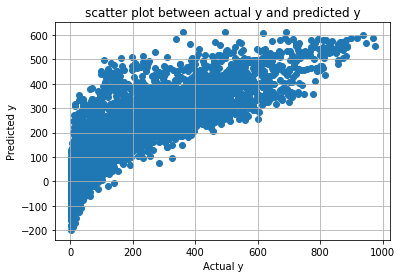

R^2 score: 0.6797662599547913
Mean Squared Error : 10579.550676035087
Mean Absolute Error : 75.73959658704698


In [382]:
from sklearn.linear_model import SGDRegressor
clf_ = SGDRegressor()
clf_.fit(X_train, y_train)
y_pred=clf_.predict(X_test)
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()

print('R^2 score:',r2_score(y_test,y_pred))
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(X_test)))

In [383]:
score_df.loc[len(score_df.index)] = ['SGD Regressor',r2_score(y_test,y_pred),mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred))]
score_df

,Method,R2score,Error,SquaredError,RMSE
0,Linear,0.679842,75.925208,10577.036202,102.844719
1,SGD Regressor,0.679766,75.739597,10579.550676,102.856943


### Linear regression using sklearn (2 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [384]:
# YOUR CODE HERE

from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)
model.coef_
model.score(X_train, y_train)

0.6882509808659066

In [385]:
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
lr_model.coef_.shape

(58,)

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [386]:
# YOUR CODE HERE
print("R^2 score: ",r2_score(y_test,y_pred))

R^2 score:  0.6798138699223745


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score. 
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

Feature: 0, Score: 20.42084
Feature: 1, Score: 81.00115
Feature: 2, Score: -0.13562
Feature: 3, Score: 7.70611
Feature: 4, Score: 1.92798
Feature: 5, Score: 5.87882
Feature: 6, Score: -3.89278
Feature: 7, Score: 283.11943
Feature: 8, Score: -195.82227
Feature: 9, Score: 29.65734


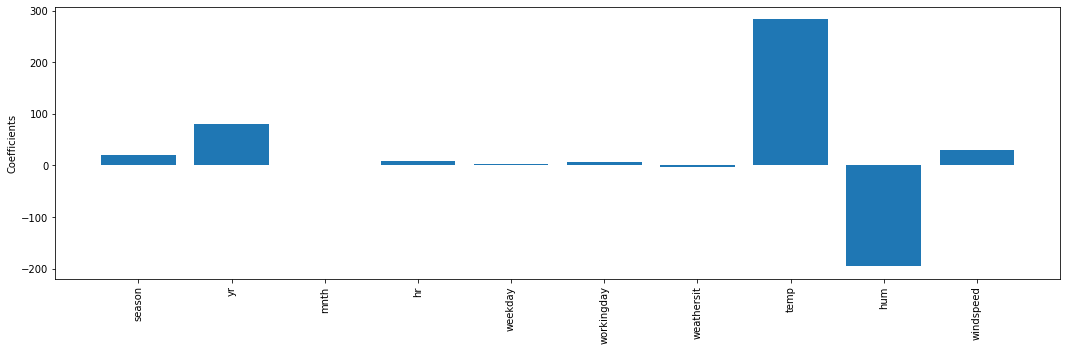

In [387]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
labels=['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed']

X=df_hour[labels]
y=df_hour['cnt']
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig, ax = plt.subplots(figsize=(18,5))
# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.bar(labels,importance)
pyplot.ylabel('Coefficients')
ax.set_xticklabels(labels,rotation=90)
pyplot.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [388]:
# setting up alpha
alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [389]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
for alpha in alphas:
  lassoReg = Lasso(alpha=alpha , normalize=True)

  lassoReg.fit(X_train,y_train)

  y_pred = lassoReg.predict(X_test)

  #Accuracy of the model
  r2=lassoReg.score(X_test,y_test)
  print("Alpha value",alpha)
  print("R^2 score: ",r2)
  print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print("******************************")
  if alpha==0.0001:
    score_df.loc[len(score_df.index)] = ['Lasso Regressor',r2,mean_squared_error(y_test, y_pred),mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred))]


Alpha value 0.0001
R^2 score:  0.6798565145774089
Mean Root Squared Error: 102.84244715718751
******************************
Alpha value 0.001
R^2 score:  0.6799040939141856
Mean Root Squared Error: 102.83480471330063
******************************
Alpha value 0.01
R^2 score:  0.6779881608385252
Mean Root Squared Error: 103.14210427015165
******************************
Alpha value 0.1
R^2 score:  0.5966151421222228
Mean Root Squared Error: 115.44094246571765
******************************
Alpha value 1
R^2 score:  -8.244709666649364e-05
Mean Root Squared Error: 181.76822665703344
******************************
Alpha value 10
R^2 score:  -8.244709666649364e-05
Mean Root Squared Error: 181.76822665703344
******************************
Alpha value 100
R^2 score:  -8.244709666649364e-05
Mean Root Squared Error: 181.76822665703344
******************************


In [390]:
score_df

,Method,R2score,Error,SquaredError,RMSE
0,Linear,0.679842,75.925208,10577.036202,102.844719
1,SGD Regressor,0.679766,75.739597,10579.550676,102.856943
2,Lasso Regressor,0.679857,10576.568937,10576.568937,102.842447


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [391]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.0001, normalize=True)
ridgeReg.fit(X_train,y_train)
y_pred = ridgeReg.predict(X_test)


# calculating R^2 score 
r2=ridgeReg.score(X_test,y_test)
print("R^2 score: ",r2)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


R^2 score:  0.679834440957205
Mean Absolute Error: 75.92538244809974
Mean Squared Error: 10577.29818268421
Root Mean Square Error: 102.84599254557374


In [392]:
score_df.loc[len(score_df.index)] = ['Ridge',r2,mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred))]


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [393]:
# YOUR CODE HERE
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.0001, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

y_pred = ENreg.predict(X_test)


r2=ENreg.score(X_test,y_test)
print("R^2 score: ",r2)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("\n\n")

R^2 score:  0.6798367929144751
Mean Absolute Error: 75.92697507767605
Mean Squared Error: 10577.220481155562
Root Mean Square Error: 102.8456147881647





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60155176.700535096, tolerance: 39949.69174969174
  positive)


In [394]:
score_df.loc[len(score_df.index)] = ['ElasticNet',r2,mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred))]


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

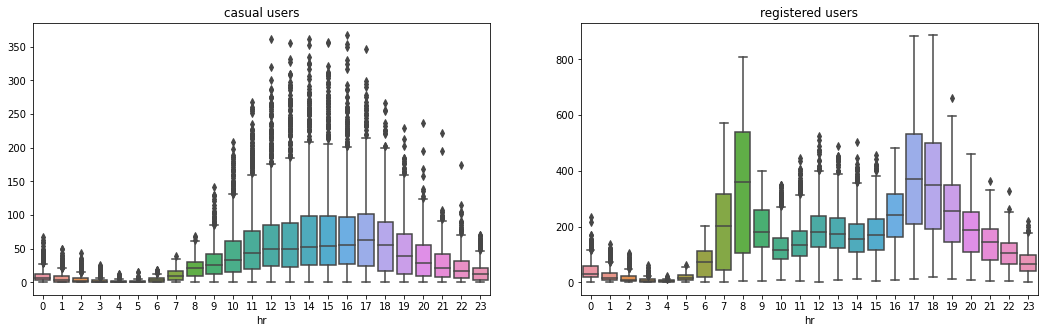

In [395]:
fig, axs = plt.subplots(1, 2, figsize=(18,5), sharex=False, sharey=False)

sns.boxplot(x='hr', y='casual', data=df, ax=axs[0])
axs[0].set_ylabel('')
axs[0].set_title('casual users')

sns.boxplot(x='hr', y='registered', data=df, ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_title('registered users');

In [396]:
df[["hr","casual","registered"]].head(5)

,hr,casual,registered
0,0,3,13
1,1,8,32
2,2,5,27
3,3,3,10
4,4,0,1


In [397]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

y=df[['casual','registered']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.33)
clf = MultiOutputRegressor(Ridge(random_state=123)).fit(X1_train, y1_train)

y1_pred = clf.predict(X1_test)


print("\n\nR^2 score:", clf.score(X1_test, y1_test))
print('Mean Absolute Error:', mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', mean_squared_error(y1_test, y1_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y1_test, y1_pred)))
print("\n\n")



R^2 score: 0.3958385319274895
Mean Absolute Error: 56.67979634469472
Mean Squared Error: 8200.259634454951
Root Mean Square Error: 90.55528496148058





Text(0, 0.5, 'y_pred')

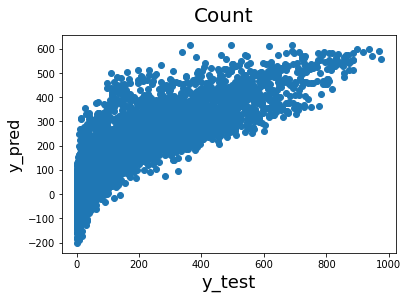

In [398]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Count', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?


**Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.**     
              

**Comment on performance of the algorithms/methods used.**

In [399]:
score_df[['Method','R2score','RMSE']]
# score_df

,Method,R2score,RMSE
0,Linear,0.679842,102.844719
1,SGD Regressor,0.679766,102.856943
2,Lasso Regressor,0.679857,102.842447
3,Ridge,0.679834,102.845993
4,ElasticNet,0.679837,102.845615


**Comment about the nature of the data and fitment of linear regression for this data.**

The influence of holidays over bike rents is very less as seen in the graphs.
We have 7 categorical values and Linear Regression explains more than 67% of the data

**Can you perform a non linear curve fitting using linear regression? If yes, How?**

Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature $X$, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in $X$, e.g. $X^2$. This process can be repeated for each input variable in the dataset, creating a transformed version of each. And, if an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$.

As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.

The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.

In [400]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))# using a pipeline to string these operations together 